In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [2]:
# Importing CSV files
dfMarkedUnmarked = pd.read_csv('markedUnmarked.csv')
dfSeed = pd.read_csv("seedDataFrame.csv")

In [3]:
# Cleanup - Dropping Seed column
dfMarkedUnmarked2 = dfMarkedUnmarked.drop(['Seed'], axis = 1)

In [4]:
# Cleanup - Dropping Seed column
dfSeed2 = dfSeed.drop(['Seed'], axis = 1)

In [5]:
# Creating tuple arrays from DataFrames
corrMU = dfMarkedUnmarked2.values
corrSeed = dfSeed2.values

# Creating 3D Array (1, 1000, 2) from both arrays
corrAll = np.array((corrMU, corrSeed)).T

# Reshaping to (1000, 2) so it matches the shape of next array
corrRS = np.reshape(corrAll, (1000, 2))

# Creating array of 1000 integers
thous = np.arange(1000).reshape(1000, 1)

In [6]:
# Dividing values so larger values can be represented with bigger nodes in graph
corrMU = dfMarkedUnmarked2.values
sizeMarkedMU = np.zeros((1000, 1))
sizeMarkedMU[corrMU>0.5]=280
sizeMarkedMU[corrMU<0.5]=14

# Dividing values so larger values can be represented with bigger nodes in graph
corrSeed = dfSeed2.values
sizeMarkedSeed = np.zeros((1000, 1))
sizeMarkedSeed[corrSeed>0.5]=280
sizeMarkedSeed[corrSeed<0.5]=14

Text(500, 0.67, 'Correct Seed')

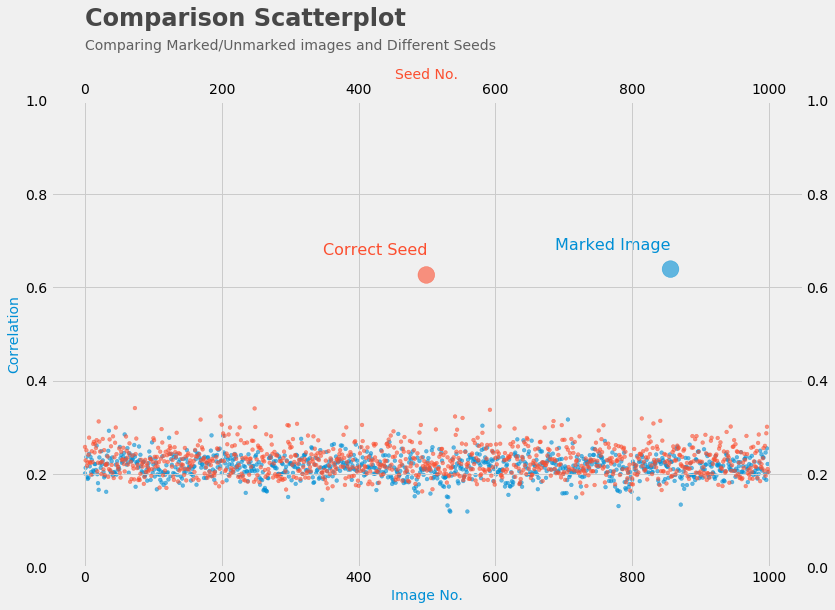

In [19]:
# Colors: https://github.com/matplotlib/matplotlib/blob/38be7aeaaac3691560aeadafe46722dda427ef47/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle
plt.style.use('fivethirtyeight')

# Creating graph
fig, ax1 = plt.subplots(figsize = (12,8))

# Setting X-axis and first Y-axis
ax1.set_xlabel('Image No.', color = '#008fd5', fontsize = 14)
ax1.set_ylabel('Correlation', color = '#008fd5', fontsize = 14)

# Creating a second Y-axis that shares the same X-axis
ax2 = ax1.twinx()
ax2.set_ylabel('', color = '#fc4f30', fontsize = 14)

# Creating a second X-axis that shares the same Y-axis
ax2 = ax1.twiny() 
ax2.set_xlabel('Seed No.', color = '#fc4f30', fontsize = 14) 

# Show grid
ax1.grid(False, which='minor', axis='both')
ax2.grid(True, which='minor', axis='both')

# Setting different colors for each variable
ax1.scatter(y = corrRS[:, 0], x = thous, color = '#008fd5', alpha = 0.6, s = sizeMarkedMU)
ax2.scatter(y = corrRS[:, 1], x = thous, color = '#fc4f30', alpha = 0.6, s = sizeMarkedSeed)

# Setting top and bottom values for Y-axes
ax1.set_ylim(bottom=0, top=1)
ax2.set_ylim(bottom=0, top=1)

# Title
# Y value is continuous to values on Y-axis. For instance,
# if the maximum value is 60, the text can begin at 61.
# Alpha indicates text opacity
ax1.text(x = 0, y = 1.16, s = "Comparison Scatterplot", fontsize = 24, weight = 'bold', alpha = .7)

# Subtitle
ax1.text(x = 0, y = 1.11, s = "Comparing Marked/Unmarked images and Different Seeds", fontsize = 14, alpha = .6)

# Text next to largest values
ax1.text(x = 856, y = 0.68, s = "Marked Image", ha = 'right', color = "#008fd5", fontsize = 16)
ax2.text(x = 500, y = 0.67, s = "Correct Seed", ha = 'right', color = "#fc4f30", fontsize = 16)